# PREPROCESSING

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the genexpression dataset

In [66]:
genexp = pd.read_csv('GSE58661_series_matrix.txt.gz', compression ='gzip', header = 61, sep = '\t', quotechar = '"')

In [67]:
genexp.head()

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
0,AFFX-BioB-3_at,7.376915,8.024915,7.522543,7.152864,7.211031,7.704962,7.779374,7.136893,7.160221,...,7.611992,7.345206,7.316975,7.418340,7.756286,7.215856,7.465109,7.245458,7.039592,7.393667
1,AFFX-BioB-5_at,6.984530,7.427048,7.077207,6.849513,6.753131,7.195947,7.429800,6.745630,6.751358,...,7.175015,7.014479,6.913879,6.898449,7.347570,6.740992,7.080787,6.725812,6.575376,7.041106
2,AFFX-BioB-M_at,7.330576,8.010530,7.334551,7.143286,7.077163,7.753484,7.712429,7.036303,7.089186,...,7.612393,7.285821,7.324635,7.408880,7.745624,7.152722,7.422373,7.263596,6.975162,7.366620
3,AFFX-BioC-3_at,10.922741,11.390638,10.936703,10.791909,10.701328,11.221732,11.084229,10.588372,10.628909,...,11.097486,10.908682,10.781228,10.935723,11.200635,10.707980,10.736531,10.770440,10.367009,10.753221
4,AFFX-BioC-5_at,11.032030,11.533338,11.018510,10.875259,10.823792,11.276973,11.178643,10.700420,10.779332,...,11.265739,10.990373,10.900765,11.101546,11.343329,10.842697,10.900509,10.838008,10.494806,10.863600


In [68]:
genexp.tail()

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
60603,merck2-Z70222_a_at,6.892053,5.513603,6.112918,6.276813,7.041829,7.560786,7.446324,7.821045,7.465401,...,7.028523,6.229570,7.543618,7.518894,6.541189,6.493021,7.952822,6.978308,7.460604,7.519374
60604,merck2-Z70608_x_at,1.777216,1.940099,1.753519,1.889742,1.686633,1.988420,1.723665,2.029634,1.986343,...,3.246869,1.910438,1.910438,2.054199,1.730252,1.924313,1.783032,1.371800,1.811532,2.444065
60605,merck2-Z72499_a_at,9.031084,9.527973,9.515653,9.383670,9.464486,9.558521,9.651009,9.479608,9.417764,...,9.349558,9.377011,9.379870,9.398441,9.269749,9.223950,9.481911,9.632680,9.313734,9.527973
60606,merck2-Z75331_a_at,7.284069,6.985508,6.556233,7.293852,6.244336,5.562862,6.933691,6.389961,6.860160,...,6.622611,6.406113,6.642260,6.292372,6.618915,5.817185,7.487134,7.410402,6.396247,5.605377
60607,!series_matrix_table_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
genexp = genexp.iloc[:-1]
genexp.tail()

,ID_REF,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
60602,merck2-Z48633_s_at,10.286077,11.173715,10.586540,10.257621,10.634072,10.741879,9.823555,9.715532,9.966245,...,11.189195,11.522115,10.793982,11.744113,11.147193,11.010846,9.975013,10.044351,8.798358,10.444210
60603,merck2-Z70222_a_at,6.892053,5.513603,6.112918,6.276813,7.041829,7.560786,7.446324,7.821045,7.465401,...,7.028523,6.229570,7.543618,7.518894,6.541189,6.493021,7.952822,6.978308,7.460604,7.519374
60604,merck2-Z70608_x_at,1.777216,1.940099,1.753519,1.889742,1.686633,1.988420,1.723665,2.029634,1.986343,...,3.246869,1.910438,1.910438,2.054199,1.730252,1.924313,1.783032,1.371800,1.811532,2.444065
60605,merck2-Z72499_a_at,9.031084,9.527973,9.515653,9.383670,9.464486,9.558521,9.651009,9.479608,9.417764,...,9.349558,9.377011,9.379870,9.398441,9.269749,9.223950,9.481911,9.632680,9.313734,9.527973
60606,merck2-Z75331_a_at,7.284069,6.985508,6.556233,7.293852,6.244336,5.562862,6.933691,6.389961,6.860160,...,6.622611,6.406113,6.642260,6.292372,6.618915,5.817185,7.487134,7.410402,6.396247,5.605377


In [70]:
genexp = genexp.T
genexp.head()

,0,1,2,3,4,5,6,7,8,9,...,60597,60598,60599,60600,60601,60602,60603,60604,60605,60606
ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
GSM1416529,8.024915,7.427048,8.01053,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
GSM1416530,7.522543,7.077207,7.334551,10.936703,11.01851,13.360017,12.540647,1.355337,1.343599,1.306212,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233
GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,...,7.136409,2.904756,5.954062,6.738276,11.2403,10.257621,6.276813,1.889742,9.38367,7.293852


In [71]:
headers = genexp.iloc[0]
genexp.columns = [headers]  
genexp = genexp.iloc[1:]
genexp.reset_index(inplace=True)
genexp = genexp.rename(columns = {'index':'microarray_id'})
genexp.head()

ID_REF,microarray_id,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
0,GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,GSM1416529,8.024915,7.427048,8.01053,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,GSM1416530,7.522543,7.077207,7.334551,10.936703,11.01851,13.360017,12.540647,1.355337,1.343599,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233
3,GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,...,7.136409,2.904756,5.954062,6.738276,11.2403,10.257621,6.276813,1.889742,9.38367,7.293852
4,GSM1416532,7.211031,6.753131,7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,...,7.66715,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


In [51]:
genexp.shape

(89, 60607)

## Explore the genexpression dataset

## Read the clinical dataset

In [36]:
clinical = pd.read_excel('Lung3.metadata.xls')

In [37]:
clinical.head()

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
3,LUNG3-04,lung_4,LUNG3-04.CEL,Left Lower Lobe,Homo sapiens,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1,Primary,Not Available,total RNA,biotin,GPL15048
4,LUNG3-05,lung_5,LUNG3-05.CEL,Left Lower Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0,Primary,2,total RNA,biotin,GPL15048


In [38]:
clinical.tail()

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
84,LUNG3-85,lung_85,LUNG3-85.CEL,Right Upper Lobe,Homo sapiens,M,"Adenocarcinoma, Acinar Type",2.2,pT1b,pN0,pM0,Primary,Not Available,total RNA,biotin,GPL15048
85,LUNG3-86,lung_86,LUNG3-86.CEL,Right Upper Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",5.0,pT3,PN2,pM0,Primary,3,total RNA,biotin,GPL15048
86,LUNG3-87,lung_87,LUNG3-87.CEL,Right Middle Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, Papillary",3.5,pT2,pN0,pM0,Primary,2,total RNA,biotin,GPL15048
87,LUNG3-88,lung_88,LUNG3-88.CEL,Right Upper Lobe,Homo sapiens,M,"Non-Small Cell, Pleomorphic Type",8.5,pT3,pN0,pM0,Primary,Not Available,total RNA,biotin,GPL15048
88,LUNG3-89,lung_89,LUNG3-89.CEL,Left Upper Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",3.5,pT2,pN1,pM0,Primary,1,total RNA,biotin,GPL15048


In [39]:
clinical.shape

(89, 16)

## Explore the clinical dataset

In [89]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   sample.name                                     89 non-null     object 
 1   title                                           89 non-null     object 
 2   CEL.file                                        89 non-null     object 
 3   source.location                                 89 non-null     object 
 4   organism                                        89 non-null     object 
 5   characteristics.tag.gender                      89 non-null     object 
 6   characteristics.tag.histology                   89 non-null     object 
 7   characteristics.tag.tumor.size.maximumdiameter  88 non-null     float64
 8   characteristics.tag.stage.primary.tumor         89 non-null     object 
 9   characteristics.tag.stage.nodes              

Beside the tumor size (float) all the other features are categorical data, which will be investigated in the following.

In [92]:
pd.Series({c: clinical[c].unique() for c in clinical})

sample.name                                       [LUNG3-01, LUNG3-02, LUNG3-03, LUNG3-04, LUNG3...
title                                             [lung_1, lung_2, lung_3, lung_4, lung_5, lung_...
CEL.file                                          [LUNG3-01.CEL, LUNG3-02.CEL, LUNG3-03.CEL, LUN...
source.location                                   [Left  Lower Lobe, Right    Lower Lobe, Left  ...
organism                                                                             [Homo sapiens]
characteristics.tag.gender                                                                   [M, F]
characteristics.tag.histology                     [Squamous Cell Carcinoma, NOS, Adenocarcinoma,...
characteristics.tag.tumor.size.maximumdiameter    [4.0, 1.3, 11.0, nan, 7.8, 3.5, 5.2, 4.2, 6.2,...
characteristics.tag.stage.primary.tumor           [pT2, pT1, pT3, pTX, pT2b, pT4, pT1a, pT2a, pT...
characteristics.tag.stage.nodes                                      [pN0, pNX, pNx, pN2, pN1, PN2]


The sample variable, title and CEL.file variables do not contain relevant information for this analysis and can therefore be discarded. The source location might be quite interesting to see whether there are differences in the gene expression based on the tumor location (lung tissue should be quite similar so this might not have an effect). The organism column can be dropped as well since it was a human study. The gender might be relevant feature but needs to be recoded to 0/1 to make use of it. The histology variable is the outcome, this means we have labelled data, which of course needs to be removed from the feature set, but will be used to assess the model performance and for visualisation purposes. The size is a continous measure and can be used as a feature. The primary stage of the tumor could be a very intersting parameter as well but needs to be reformatted as well. Nodes and mets could be intersting as well but a bit harder to redefine. TheprimaryVSmets tested molecule label and platform can be discarded as well (measurement techique details, which are same for all observations).

In [106]:
clinical_filtered = clinical[['characteristics.tag.histology', 'source.location', 'characteristics.tag.gender', 'characteristics.tag.tumor.size.maximumdiameter']]
clinical_filtered.head()

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3
2,Non-Small Cell,Left Lower Lobe,0,11.0
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,NaN
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8


In [107]:
clinical_filtered['characteristics.tag.gender'] = clinical_filtered['characteristics.tag.gender'].replace(['M','F'],[0,1])
clinical_filtered.head()

C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\251401582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_filtered['characteristics.tag.gender'] = clinical_filtered['characteristics.tag.gender'].replace(['M','F'],[0,1])


,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3
2,Non-Small Cell,Left Lower Lobe,0,11.0
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,NaN
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8


In [110]:
clinical_filtered.isnull().sum()

characteristics.tag.histology                     0
source.location                                   0
characteristics.tag.gender                        0
characteristics.tag.tumor.size.maximumdiameter    1
dtype: int64

There is one missing value in the tumor size. Since the dataset is quite small already it would be preferable to fill this value in instead of dropping the whole observation. 

(array([13., 14., 11., 10.,  8., 11.,  7.,  3.,  3.,  3.,  1.,  0.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. , 17.8,
        18.6, 19.4, 20.2, 21. ]),
 <BarContainer object of 25 artists>)

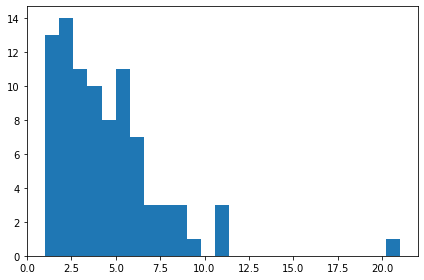

In [115]:
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(clinical_filtered['characteristics.tag.tumor.size.maximumdiameter'], bins=25)

The distribution is skewed so the mean would not be a good measure to choose to fill in the missing value. The median might be the better measure.

In [126]:
tumor_size_med = clinical_filtered['characteristics.tag.tumor.size.maximumdiameter'].median()
clinical_filtered.fillna(tumor_size_med, inplace = True)

C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\2375321070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_filtered.fillna(tumor_size_med, inplace = True)


## concatenate the two datasets

In [127]:
df = pd.concat([clinical_filtered, genexp], axis = 1)
df.head()

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter,"(microarray_id,)","(AFFX-BioB-3_at,)","(AFFX-BioB-5_at,)","(AFFX-BioB-M_at,)","(AFFX-BioC-3_at,)","(AFFX-BioC-5_at,)",...,"(merck2-Z41436_at,)","(merck2-Z43503_at,)","(merck2-Z47244_x_at,)","(merck2-Z47250_x_at,)","(merck2-Z48501_s_at,)","(merck2-Z48633_s_at,)","(merck2-Z70222_a_at,)","(merck2-Z70608_x_at,)","(merck2-Z72499_a_at,)","(merck2-Z75331_a_at,)"
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0,GSM1416528,7.376915,6.98453,7.330576,10.922741,11.03203,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3,GSM1416529,8.024915,7.427048,8.01053,11.390638,11.533338,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,Non-Small Cell,Left Lower Lobe,0,11.0,GSM1416530,7.522543,7.077207,7.334551,10.936703,11.01851,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5,GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,...,7.136409,2.904756,5.954062,6.738276,11.2403,10.257621,6.276813,1.889742,9.38367,7.293852
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8,GSM1416532,7.211031,6.753131,7.077163,10.701328,10.823792,...,7.66715,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


In [128]:
# extract the labels from the dataset
labels = df['characteristics.tag.histology'].values
print(labels.shape)
print(df.shape)
df.drop('characteristics.tag.histology', axis=1, inplace=True)
print(df.shape)

(89,)
(89, 60612)
(89, 60611)


In [130]:
#Check for missing values
df.isnull().sum().sum()

0

In [131]:
# write dataframe to file
df.to_csv('Clinical_Gene_Exp.csv')